In [1]:
#Dataset: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types?resource=download

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd "/content/drive/MyDrive/IA/Pokemon"
!ls

/content/drive/MyDrive/IA/Pokemon
imagenes  images  PokemonCNN.ipynb  pokemon.csv


In [4]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

IMAGES_PATH ="/content/drive/MyDrive/IA/Pokemon/imagenes/train/images"

pokemon = pd.read_csv('pokemon.csv')
pokemon = pokemon.sort_values(by='Name')

display(pokemon.head())
display(pokemon.describe())
pokemonTypes = pokemon['Type1'].unique()
display(pokemonTypes)
print("Number of pokemon types:", len(pokemonTypes))

,Name,Type1,Type2
459,abomasnow,Grass,Ice
62,abra,Psychic,NaN
358,absol,Dark,NaN
616,accelgor,Bug,NaN
680,aegislash-blade,Steel,Ghost


,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,abomasnow,Water,Flying
freq,1,114,95


array(['Grass', 'Psychic', 'Dark', 'Bug', 'Steel', 'Rock', 'Normal',
       'Water', 'Dragon', 'Electric', 'Poison', 'Fire', 'Fairy', 'Ice',
       'Ground', 'Ghost', 'Fighting', 'Flying'], dtype=object)

Number of pokemon types: 18


File names from images:

['doduo.png', 'dodrio.png', 'donphan.png', 'doublade.png', 'ditto.png', 'electabuzz.png', 'dragalge.png', 'druddigon.png', 'ducklett.png', 'dustox.png', 'duosion.png', 'dwebble.png', 'eevee.png', 'eelektross.png', 'electrode.png', 'drilbur.png', 'duskull.png', 'drowzee.png', 'drifloon.png', 'ekans.png', 'eelektrik.png', 'electrike.png', 'durant.png', 'drifblim.png', 'drampa.jpg', 'dragonite.png', 'dragonair.png', 'dusknoir.png', 'electivire.png', 'drapion.png', 'elekid.png', 'elgyem.png', 'dunsparce.png', 'dugtrio.png', 'dratini.png', 'dusclops.png', 'emboar.png', 'empoleon.png', 'exploud.png', 'flaaffy.png', 'fletchling.png', 'fletchinder.png', 'espurr.png', 'exeggcute.png', 'ferroseed.png', 'fennekin.png', 'forretress.png', 'flygon.png', 'feraligatr.png', 'florges.png', 'entei.png', 'fomantis.jpg', 'flabebe.png', 'foongus.png', 'excadrill.png', 'farfetchd.png', 'floatzel.png', 'finneon.png', 'emolga.png', 'espeon.png', 'flareon.png', 'ferrothorn.png', 'feebas

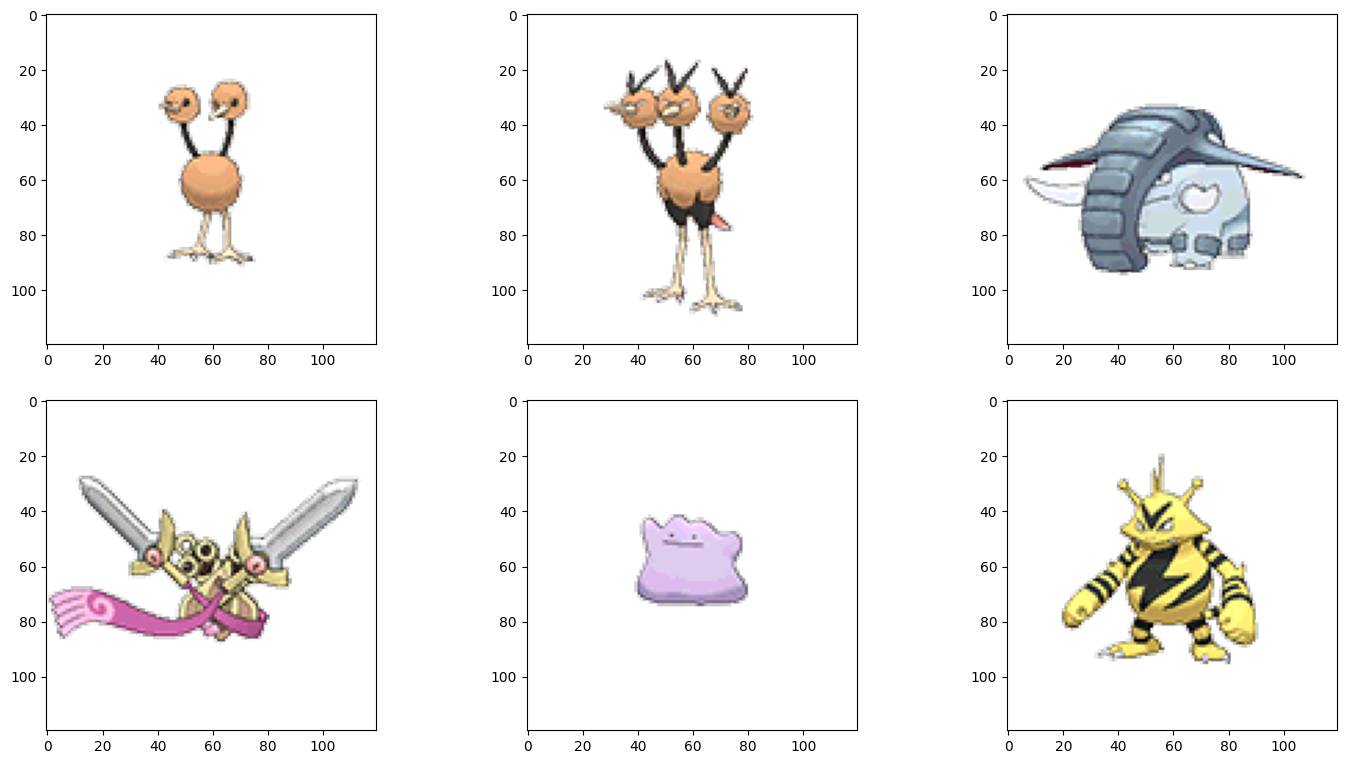

In [5]:
# Display Images
from PIL import Image

trainImages = os.listdir(IMAGES_PATH)
print("File names from images:\n")
print(trainImages)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = trainImages[0:6]

def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(6):
        state = os.path.join(IMAGES_PATH, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()

In [6]:
data_dict = {}

for key, val in zip(pokemon["Name"], pokemon["Type1"]):
    data_dict[key] = val
print(data_dict)

{'abomasnow': 'Grass', 'abra': 'Psychic', 'absol': 'Dark', 'accelgor': 'Bug', 'aegislash-blade': 'Steel', 'aerodactyl': 'Rock', 'aggron': 'Steel', 'aipom': 'Normal', 'alakazam': 'Psychic', 'alomomola': 'Water', 'altaria': 'Dragon', 'amaura': 'Rock', 'ambipom': 'Normal', 'amoonguss': 'Grass', 'ampharos': 'Electric', 'anorith': 'Rock', 'araquanid': 'Water', 'arbok': 'Poison', 'arcanine': 'Fire', 'arceus': 'Normal', 'archen': 'Rock', 'archeops': 'Rock', 'ariados': 'Bug', 'armaldo': 'Rock', 'aromatisse': 'Fairy', 'aron': 'Steel', 'articuno': 'Ice', 'audino': 'Normal', 'aurorus': 'Rock', 'avalugg': 'Ice', 'axew': 'Dragon', 'azelf': 'Psychic', 'azumarill': 'Water', 'azurill': 'Normal', 'bagon': 'Dragon', 'baltoy': 'Ground', 'banette': 'Ghost', 'barbaracle': 'Rock', 'barboach': 'Water', 'basculin-red-striped': 'Water', 'bastiodon': 'Rock', 'bayleef': 'Grass', 'beartic': 'Ice', 'beautifly': 'Bug', 'beedrill': 'Bug', 'beheeyem': 'Psychic', 'beldum': 'Steel', 'bellossom': 'Grass', 'bellsprout': 

In [7]:
IDs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(pokemonTypes,IDs))

print(labels_idx)

{'Grass': 0, 'Psychic': 1, 'Dark': 2, 'Bug': 3, 'Steel': 4, 'Rock': 5, 'Normal': 6, 'Water': 7, 'Dragon': 8, 'Electric': 9, 'Poison': 10, 'Fire': 11, 'Fairy': 12, 'Ice': 13, 'Ground': 14, 'Ghost': 15, 'Fighting': 16, 'Flying': 17}


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = "/content/drive/MyDrive/IA/Pokemon"

base_dir = 'imagenes'
train_dir = os.path.join(base_dir,'train')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,)

Found 647 images belonging to 1 classes.


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<Figure size 640x480 with 0 Axes>

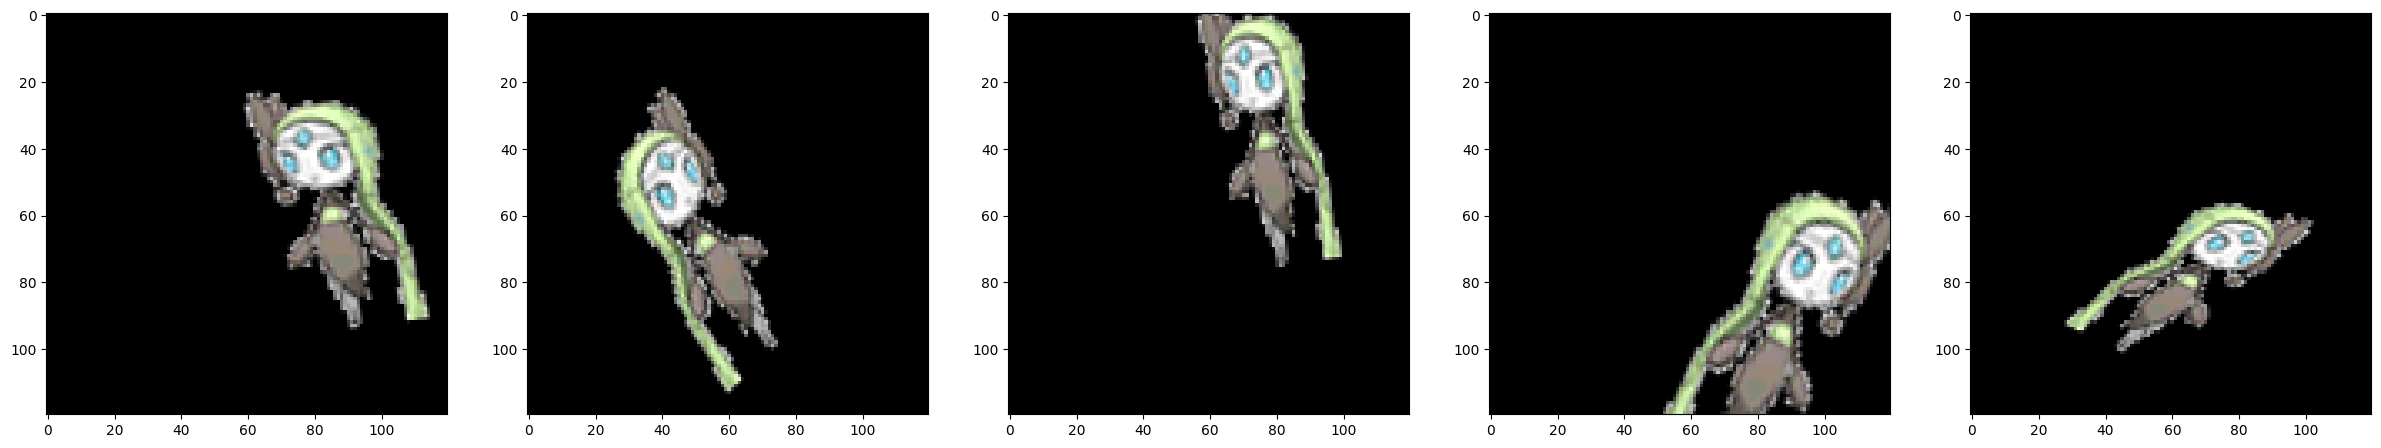

In [9]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (120, 120),
							batch_size = 1,
							class_mode ='categorical',
							)


plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 647 images belonging to 1 classes.
(8, 120, 120, 3)


<Figure size 640x480 with 0 Axes>

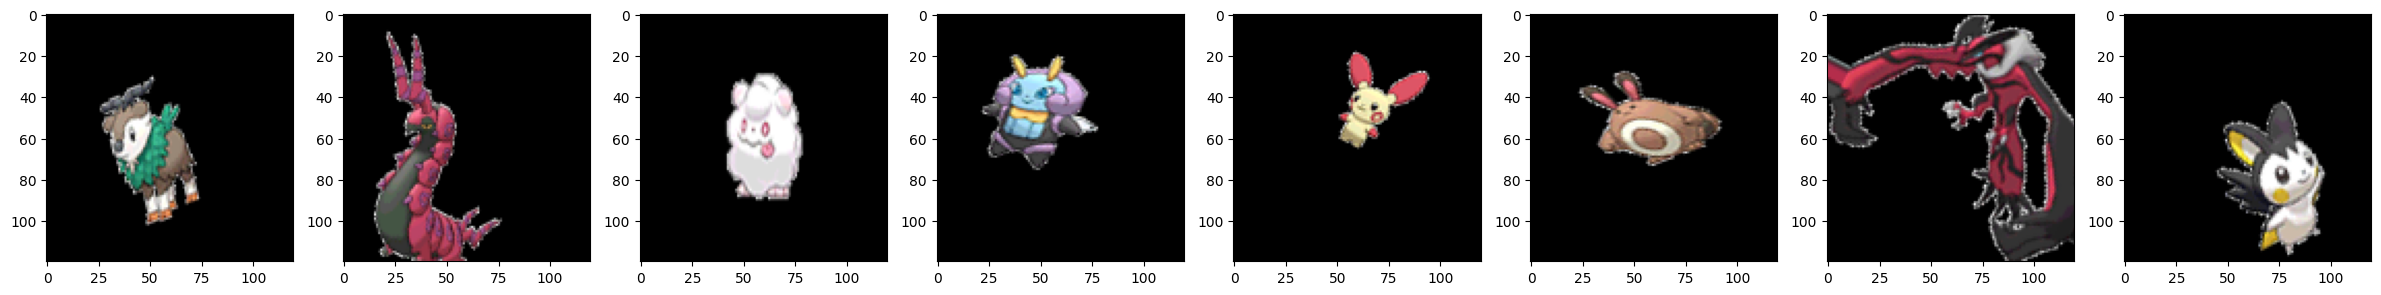

In [10]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (120, 120),
							batch_size = 8,
							class_mode ='categorical',
							)


images , labels = train_generator[0]

print(images.shape)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

In [11]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (120, 120),
							batch_size = 647,
							class_mode ='categorical'
							)

Found 647 images belonging to 1 classes.


In [12]:
image_names = train_generator.filenames
print(image_names)

['images/ditto.png', 'images/dodrio.png', 'images/doduo.png', 'images/donphan.png', 'images/doublade.png', 'images/dragalge.png', 'images/dragonair.png', 'images/dragonite.png', 'images/drampa.jpg', 'images/drapion.png', 'images/dratini.png', 'images/drifblim.png', 'images/drifloon.png', 'images/drilbur.png', 'images/drowzee.png', 'images/druddigon.png', 'images/ducklett.png', 'images/dugtrio.png', 'images/dunsparce.png', 'images/duosion.png', 'images/durant.png', 'images/dusclops.png', 'images/dusknoir.png', 'images/duskull.png', 'images/dustox.png', 'images/dwebble.png', 'images/eelektrik.png', 'images/eelektross.png', 'images/eevee.png', 'images/ekans.png', 'images/electabuzz.png', 'images/electivire.png', 'images/electrike.png', 'images/electrode.png', 'images/elekid.png', 'images/elgyem.png', 'images/emboar.png', 'images/emolga.png', 'images/empoleon.png', 'images/entei.png', 'images/escavalier.png', 'images/espeon.png', 'images/espurr.png', 'images/excadrill.png', 'images/exeggcu

In [13]:
images , labels = train_generator[0]

print(images.shape)

(647, 120, 120, 3)


In [14]:
labels.shape

(647, 1)

In [15]:
final_labels_train = []
count = 0

for file in image_names:
    name = file.split('/')[-1].split('.')[0]
    label = labels_idx[data_dict[name]]

    final_labels_train.append(np.array(label))
   
final_labels_train = np.array(final_labels_train, dtype = np.int8).reshape(647, 1)

In [16]:
test_dir ="/content/drive/MyDrive/IA/Pokemon/imagenes/test/images"

In [17]:
fileTest = os.listdir(test_dir)

In [18]:
final_images_test = []
final_labels_test = []
for file in fileTest:
    img = cv2.imread(os.path.join(test_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 

    final_images_test.append(np.array(img))
    final_labels_test.append(np.array(label))
    
final_images_test = np.array(final_images_test, dtype = np.float32)/255.0
final_labels_test = np.array(final_labels_test, dtype = np.int8).reshape(162, 1)

In [19]:
X_train = images
X_test = final_images_test
y_train = final_labels_train
y_test = final_labels_test


print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (647, 120, 120, 3)
Forma de X_test: (162, 120, 120, 3)
Forma de y_train: (647, 1)
Forma de y_test: (162, 1)


In [20]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

# Definir el número de tipos de Pokémon diferentes en el conjunto de datos
num_classes = 18  # Por ejemplo, si hay 18 tipos diferentes de Pokémon

# Convertir las etiquetas a one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Crear el modelo
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape=(120, 120, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Cambiado a activación softmax

model.summary()

# Compilar el modelo
model.compile(loss='categorical_crossentropy',  # Cambiado a categorical_crossentropy
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 10)      280       
                                                                 
 flatten (Flatten)           (None, 139240)            0         
                                                                 
 dense (Dense)               (None, 256)               35645696  
                                                                 
 dense_1 (Dense)             (None, 18)                4626      
                                                                 
Total params: 35,650,602
Trainable params: 35,650,602
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Entrenar el modelo
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=50
)

Epoch 1/50
21/21 [==============================] - 18s 806ms/step - loss: 2.8795 - acc: 0.1206
Epoch 2/50
21/21 [==============================] - 16s 790ms/step - loss: 2.6502 - acc: 0.1839
Epoch 3/50
21/21 [==============================] - 17s 799ms/step - loss: 2.5548 - acc: 0.2303
Epoch 4/50
21/21 [==============================] - 16s 787ms/step - loss: 2.4247 - acc: 0.3122
Epoch 5/50
21/21 [==============================] - 18s 880ms/step - loss: 2.3347 - acc: 0.3400
Epoch 6/50
21/21 [==============================] - 19s 899ms/step - loss: 2.2331 - acc: 0.3771
Epoch 7/50
21/21 [==============================] - 17s 799ms/step - loss: 2.1083 - acc: 0.4359
Epoch 8/50
21/21 [==============================] - 17s 802ms/step - loss: 2.0210 - acc: 0.5039
Epoch 9/50
21/21 [==============================] - 17s 801ms/step - loss: 1.9343 - acc: 0.5147
Epoch 10/50
21/21 [==============================] - 19s 917ms/step - loss: 1.8633 - acc: 0.5796
Epoch 11/50
21/21 [====================

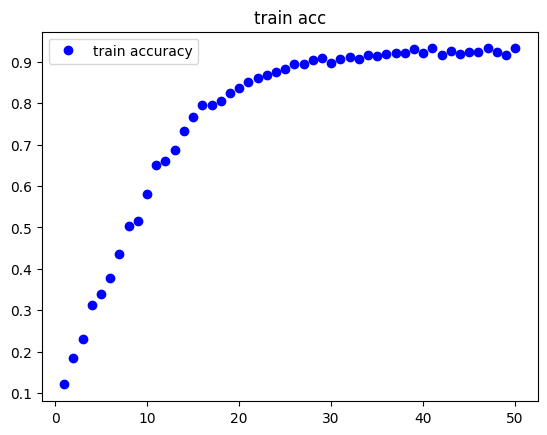

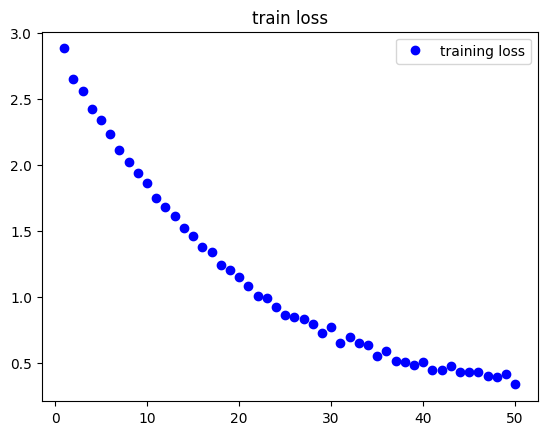

In [22]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [23]:
# Evaluar el modelo en el conjunto de pruebas
score = model.evaluate(X_test, y_test_encoded, batch_size= 162, steps= 50)
print("Loss:", score[0])
print("Accuracy:", score[1])

 1/50 [..............................] - ETA: 39s - loss: 4.9855 - acc: 0.0802

50/50 [==============================] - 1s 8ms/step - loss: 4.9855 - acc: 0.0802
Loss: 4.985467433929443
Accuracy: 0.08024691045284271
